### Predicting survival on the Titanic
- Uses the Kaggle dataset found [here](https://www.kaggle.com/competitions/titanic/)

### Imports

In [3]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## Data Pre-Processing

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


drop_cols = ["PassengerId", "Name" ]

# regex.split(r"\d", train_data["Ticket"])
train_data["Ticket"] = train_data["Ticket"].apply(lambda row: re.split(r"\D", row)[-1])
train_data["Ticket"] = pd.to_numeric(train_data["Ticket"], errors='coerce').fillna(0).astype(int)
ticket_data = train_data["Ticket"]
# Normalize the data


normalized_data = (train_data["Ticket"] - train_data["Ticket"].min()) / (train_data["Ticket"].max() - train_data["Ticket"].min())
# normalized_data = train_data["Ticket"].add()

# standardized_data = (train_data["Ticket"] - train_data["Ticket"].mean()) / train_data["Ticket"].std()
# standardized_data = (normalized_data - normalized_data.mean()) / normalized_data.std()


drop_cols = ["PassengerId", "Name",  "Cabin"]#.append("Ticket")
train_data.drop(drop_cols, axis=1, inplace=True)

# Fill in missing values
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode(), inplace=False)
gender_data = train_data.groupby("Sex")["Age"].mean()
train_data["Age"] = train_data.apply((lambda row: row["Age"] if not pd.isnull(row["Age"]) else gender_data[row["Sex"]]), axis=1)

# Normalize Data: Age, Fare
age_col = train_data["Age"]
train_data["Age"] = (age_col - age_col.min()) / (age_col.max() - age_col.min())
fare_col = train_data["Fare"]
train_data["Fare"] = (fare_col - fare_col.min()) / (fare_col.max() - fare_col.min())

# Standardize Data: Parch, SibSp
parch_col = train_data["Parch"]
train_data["Parch"] = (parch_col - parch_col.mean()) / parch_col.std()
sibsp_col = train_data["SibSp"]
train_data["SibSp"] = (sibsp_col - sibsp_col.mean()) / sibsp_col.std()

# Remove Survived Data
Y = train_data["Survived"]
train_data.drop(["Survived"], axis=1, inplace=True)

# Make Indicator Values for Categorical Data
train_data["Sex"].replace({"male": False, "female": True}, inplace=True)
dummy_cols = ["Pclass", "Sex", "Embarked"]
X = pd.get_dummies(train_data, columns=dummy_cols)

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# sr = pd.Series([1, 2, 10, 5, 2,34, 5])
train_data.plot(subplots=True)
train_data.hist(bins=20)
train_data["SibSp"].describe()

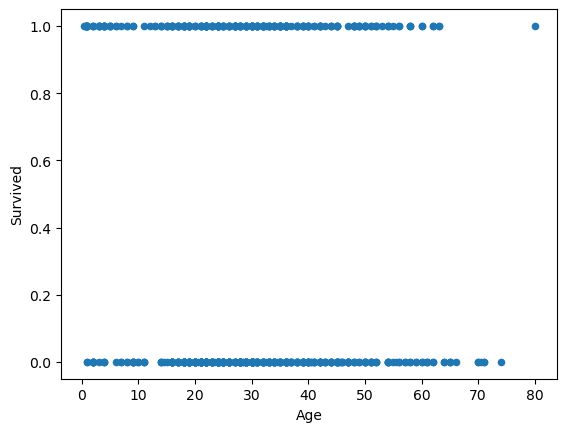

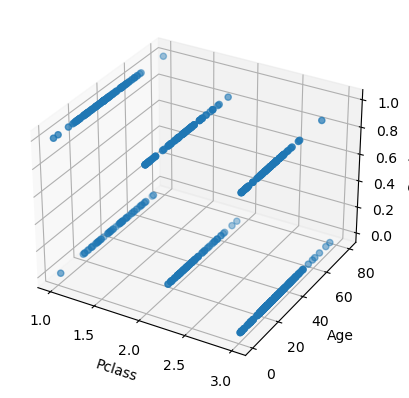

In [12]:
from mpl_toolkits.mplot3d import Axes3D
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_data.describe()

train_data.plot(x='Age', y='Survived', kind='scatter')
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train_data['Pclass'], train_data['Age'], train_data['Survived'])
ax.set_xlabel('Pclass')
ax.set_ylabel('Age')
ax.set_zlabel('Survived')

plt.show()
